# 7장 시계열 데이터를 다뤄보자

### 작성 : [PinkWink](http://pinkwink.kr) 

## 7-1. Numpy의 polyfit으로 회귀(regression) 분석하기
* pip install pandas_datareader
* conda install -c conda-forge fbprophet

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [5]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [6]:
pinkwink_web = pd.read_csv('data/07. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


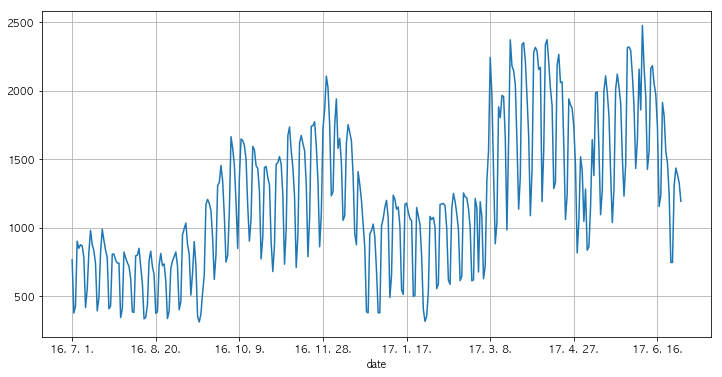

In [7]:
pinkwink_web['hit'].plot(figsize=(12,6), grid=True);

In [8]:
time = np.arange(0,len(pinkwink_web))
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
traffic = pinkwink_web['hit'].values
traffic

array([  766.,   377.,   427.,   902.,   850.,   876.,   868.,   785.,
         417.,   550.,   818.,   981.,   877.,   833.,   737.,   393.,
         489.,   817.,   989.,   908.,   835.,   782.,   408.,   429.,
         808.,   808.,   765.,   742.,   742.,   344.,   408.,   823.,
         781.,   745.,   719.,   629.,   386.,   382.,   795.,   799.,
         850.,   717.,   595.,   335.,   346.,   433.,   759.,   829.,
         716.,   659.,   375.,   386.,   727.,   812.,   723.,   736.,
         613.,   337.,   391.,   704.,   757.,   788.,   823.,   721.,
         401.,   463.,   948.,   993.,  1034.,   877.,   808.,   508.,
         669.,   899.,   732.,   352.,   312.,   369.,   522.,   655.,
        1170.,  1207.,  1178.,  1126.,   929.,   623.,   799.,  1307.,
        1331.,  1455.,  1342.,  1090.,   749.,   797.,  1117.,  1665.,
        1579.,  1461.,  1188.,   849.,  1364.,  1648.,  1637.,  1601.,
        1499.,  1159.,   902.,  1066.,  1594.,  1568.,  1453.,  1433.,
      

In [10]:
fx = np.linspace(0, time[-1], 1000)
fx

array([   0.        ,    0.36436436,    0.72872873,    1.09309309,
          1.45745746,    1.82182182,    2.18618619,    2.55055055,
          2.91491491,    3.27927928,    3.64364364,    4.00800801,
          4.37237237,    4.73673674,    5.1011011 ,    5.46546547,
          5.82982983,    6.19419419,    6.55855856,    6.92292292,
          7.28728729,    7.65165165,    8.01601602,    8.38038038,
          8.74474474,    9.10910911,    9.47347347,    9.83783784,
         10.2022022 ,   10.56656657,   10.93093093,   11.2952953 ,
         11.65965966,   12.02402402,   12.38838839,   12.75275275,
         13.11711712,   13.48148148,   13.84584585,   14.21021021,
         14.57457457,   14.93893894,   15.3033033 ,   15.66766767,
         16.03203203,   16.3963964 ,   16.76076076,   17.12512513,
         17.48948949,   17.85385385,   18.21821822,   18.58258258,
         18.94694695,   19.31131131,   19.67567568,   20.04004004,
         20.4044044 ,   20.76876877,   21.13313313,   21.49749

In [11]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [12]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.859730811
430.628410189
429.532804668
330.477730665


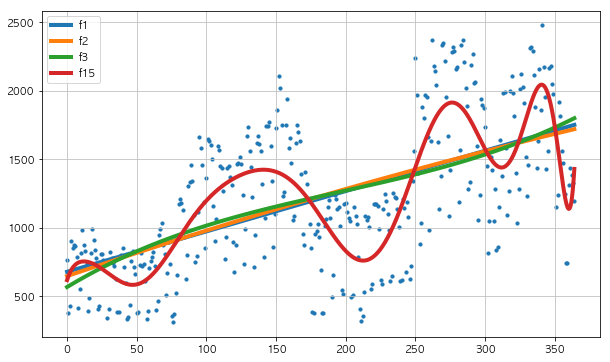

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 7-2. Prophet 모듈을 이용한 forecast 예측

In [14]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [15]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,906.773151,694.776651,1122.589745
421,2017-08-26,491.636302,277.252577,719.072118
422,2017-08-27,624.285065,399.868143,846.147677
423,2017-08-28,1177.121830,953.038742,1381.030761
424,2017-08-29,1213.103523,992.665283,1415.699709


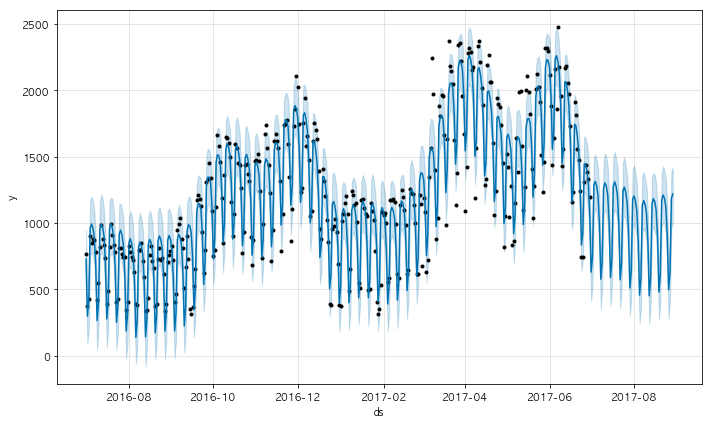

In [13]:
m.plot(forecast);

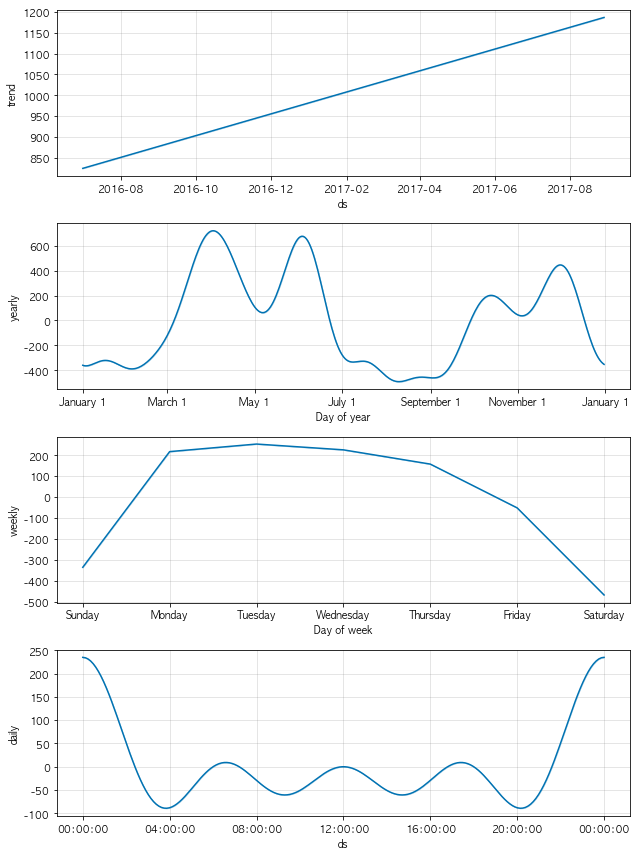

In [14]:
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [105]:
# !pip install -U finance-datareader

In [106]:
import FinanceDataReader as fdr
fdr.__version__

'0.5.0'

In [107]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업


In [108]:
len(df_krx)

2206

In [109]:
# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services


In [110]:
len(df_spx)

505

In [111]:
# 신라젠, 2018년
df = fdr.DataReader('215600', '2018')
df.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-01-01,93500,93500,93500,93500,0.0,0.0000
2018-01-02,102500,95900,104000,93300,6760000.0,0.0963
2018-01-03,103000,102600,104900,99500,4720000.0,0.0049
2018-01-04,92200,102600,104000,92200,6390000.0,-0.1049
2018-01-05,100000,85800,101200,85700,8250000.0,0.0846
2018-01-07,100000,100000,100000,100000,0.0,0.0000
2018-01-08,93800,98000,98400,92500,6280000.0,-0.0620
2018-01-09,109000,96500,119200,93800,12290000.0,0.1620
2018-01-10,98000,105000,107300,97800,6510000.0,-0.1009


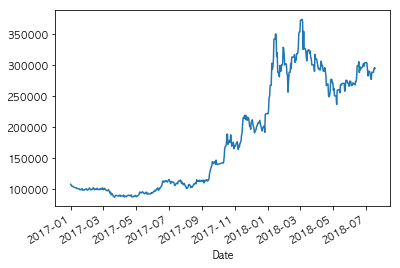

In [112]:
# 셀트리온, 2017년~현재

df = fdr.DataReader('068270', '2017')
df['Close'].plot()

In [113]:
# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2018-03-23,164.94,168.39,169.92,164.94,41030000.0,-0.0232
2018-03-26,172.77,168.07,173.10,166.44,37540000.0,0.0475
2018-03-27,168.34,173.68,175.15,166.92,40920000.0,-0.0256
2018-03-28,166.48,167.25,170.02,165.19,41670000.0,-0.0110
2018-03-29,167.78,167.81,171.75,166.90,38400000.0,0.0078


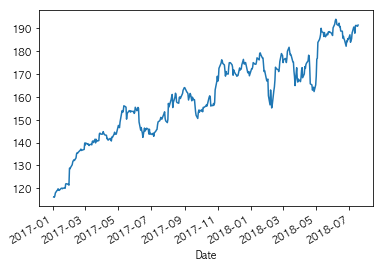

In [114]:
# 애플(AAPL), 2017년
df = fdr.DataReader('AAPL', '2017')
df['Close'].plot()

In [ ]:
# 아마존(AMZN), 2010~현재
df = fdr.DataReader('AMZN', '2010')
df['Close'].plot()

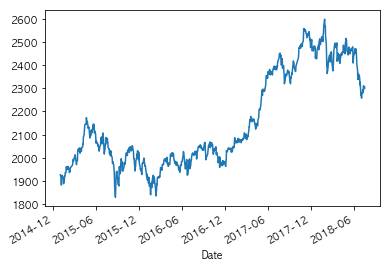

In [120]:
# KS11 (KOSPI 지수), 2015년~현재
df = fdr.DataReader('KS11', '2015')
df['Close'].plot()

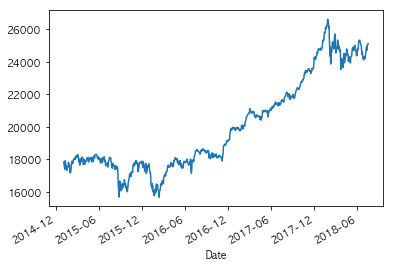

In [121]:
df = fdr.DataReader('DJI', '2015')
df['Close'].plot()

In [61]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2018-7-15'

#Ticker 확인 ex)삼성
KIA = data.get_data_yahoo('005930.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,0.092816,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,0.084765,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,0.085373,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,0.084158,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,0.087652,46880000


In [72]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2000-1-1' 
end_date = '2018-7-15'

#Ticker 확인 ex)LG이노텍
KIA = data.get_data_yahoo('011070.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-07-24,41865.898438,43813.101563,39529.199219,43034.199219,41889.550781,737993
2008-07-25,43228.898438,43228.898438,39772.601563,41379.000000,40278.378906,284684
2008-07-28,41379.000000,41671.101563,40162.000000,41184.300781,40088.855469,77134
2008-07-29,40016.000000,41817.199219,39188.398438,40697.500000,39615.007813,98510
2008-07-30,40843.500000,41281.699219,39967.300781,40746.199219,39662.410156,56572


In [63]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2018-7-15'

#Ticker 확인 ex)셀트리온
KIA = data.get_data_yahoo('068270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-19,6511.220215,7483.049805,6326.580078,7483.049805,7227.818848,513467
2005-07-20,7473.330078,7473.330078,6365.450195,6365.450195,6148.338379,434852
2005-07-21,6268.270020,6394.600098,5568.549805,5578.270020,5388.007324,187894
2005-07-22,5685.169922,5685.169922,5374.189941,5422.779785,5237.820313,71927
2005-07-25,5345.029785,5782.350098,5345.029785,5490.810059,5303.529785,62769


In [81]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2018-7-15'

#Ticker 확인 ex) SK하이닉스
KIA = data.get_data_yahoo('068270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-19,6511.220215,7483.049805,6326.580078,7483.049805,7227.818848,513467
2005-07-20,7473.330078,7473.330078,6365.450195,6365.450195,6148.338379,434852
2005-07-21,6268.270020,6394.600098,5568.549805,5578.270020,5388.007324,187894
2005-07-22,5685.169922,5685.169922,5374.189941,5422.779785,5237.820313,71927
2005-07-25,5345.029785,5782.350098,5345.029785,5490.810059,5303.529785,62769


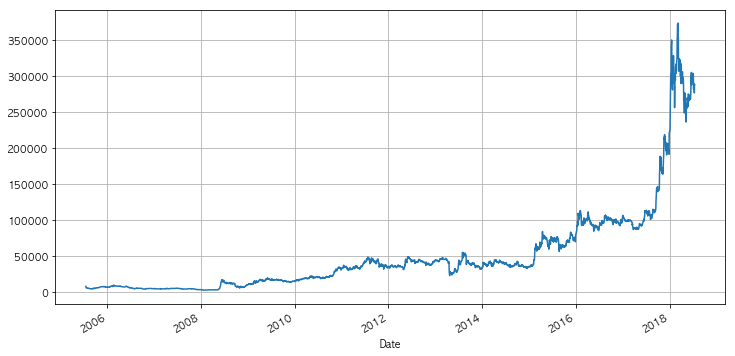

In [82]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [83]:
KIA_trunc = KIA[:'2018-7-15']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-19,6511.220215,7483.049805,6326.580078,7483.049805,7227.818848,513467
2005-07-20,7473.330078,7473.330078,6365.450195,6365.450195,6148.338379,434852
2005-07-21,6268.270020,6394.600098,5568.549805,5578.270020,5388.007324,187894
2005-07-22,5685.169922,5685.169922,5374.189941,5422.779785,5237.820313,71927
2005-07-25,5345.029785,5782.350098,5345.029785,5490.810059,5303.529785,62769
2005-07-26,5665.740234,5714.330078,5403.339844,5403.339844,5219.042969,40954
2005-07-27,5403.339844,5617.140137,5374.189941,5490.810059,5303.529785,45893
2005-07-28,5519.959961,5568.549805,5296.439941,5296.439941,5115.790039,42806
2005-07-29,5296.439941,5296.439941,5102.080078,5170.109863,4993.768555,59579


In [84]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2005-07-19,7483.049805
1,2005-07-20,6365.450195
2,2005-07-21,5578.270020
3,2005-07-22,5422.779785
4,2005-07-25,5490.810059


In [85]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [86]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3570,2019-07-09
3571,2019-07-10
3572,2019-07-11
3573,2019-07-12
3574,2019-07-13


In [87]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3570,2019-07-09,321437.092483,292906.542705,350605.414866
3571,2019-07-10,321238.876708,292172.030718,350151.361054
3572,2019-07-11,320799.940063,293074.995480,350422.550510
3573,2019-07-12,321199.928493,291844.595468,348905.198530
3574,2019-07-13,321133.422786,291983.367776,349030.271544


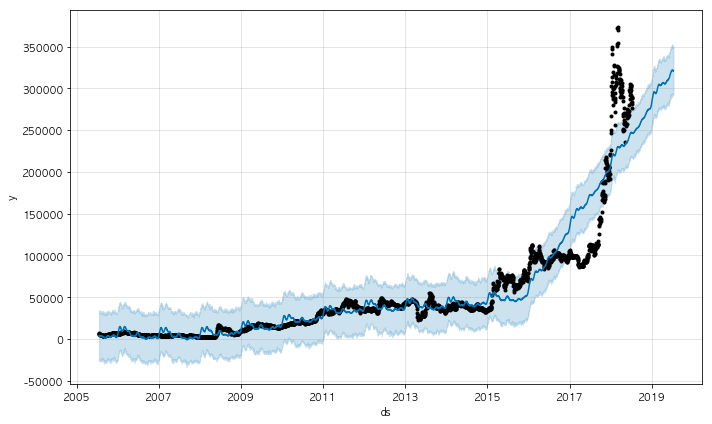

In [88]:
m.plot(forecast);

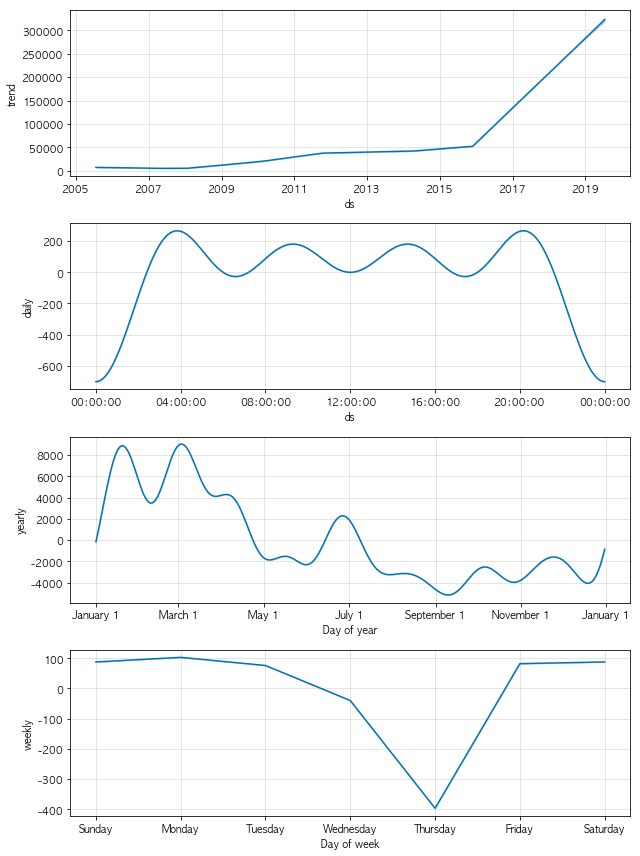

In [89]:
m.plot_components(forecast);

-----_

In [21]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '1990-1-1' 
end_date = '2018-7-15' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
    
# KIA = web.DataReader('KRX:000270','google',start,end) # 구글용... 동작이 안됨
# KIA = web.DataReader('000270.KS','yahoo',start,end) # 구글용... 동작이 안됨
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700


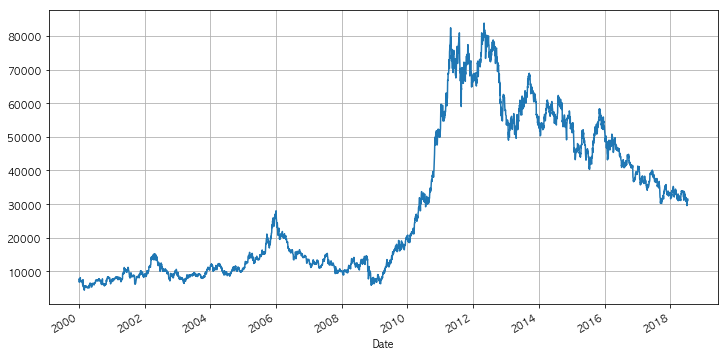

In [22]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [25]:
KIA_trunc = KIA[:'2017-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5963.754395,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5639.200684,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5395.779297,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5274.072754,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5517.486816,1076700
2000-01-11,7143.799805,7717.390137,7143.799805,7717.390137,6004.329590,1127200
2000-01-12,7717.390137,8447.410156,7300.229980,7508.810059,5842.046875,1606600
2000-01-13,7696.529785,7696.529785,7195.939941,7195.939941,5598.626953,702700
2000-01-14,7195.939941,7508.810059,6987.359863,7508.810059,5842.046875,843900


In [26]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [27]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [28]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4819,2018-12-24
4820,2018-12-25
4821,2018-12-26
4822,2018-12-27
4823,2018-12-28


In [29]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4819,2018-12-24,26647.695586,19133.624844,35862.324847
4820,2018-12-25,26681.894769,18489.937495,35750.549694
4821,2018-12-26,26643.760403,18418.038838,35078.856921
4822,2018-12-27,26597.052407,18610.868638,35884.024845
4823,2018-12-28,26539.186161,18292.745407,36348.776123


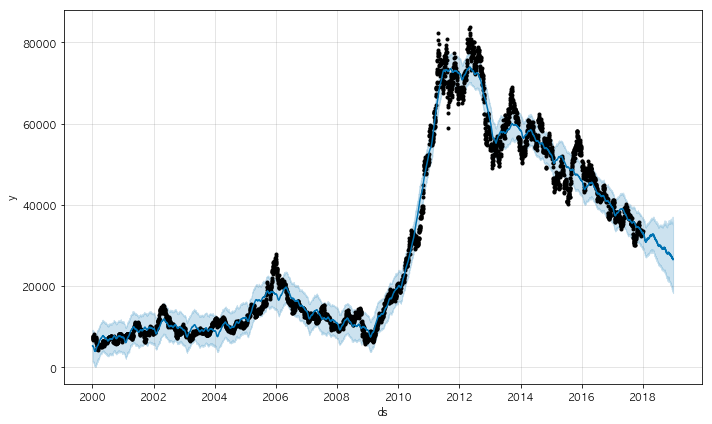

In [30]:
m.plot(forecast);

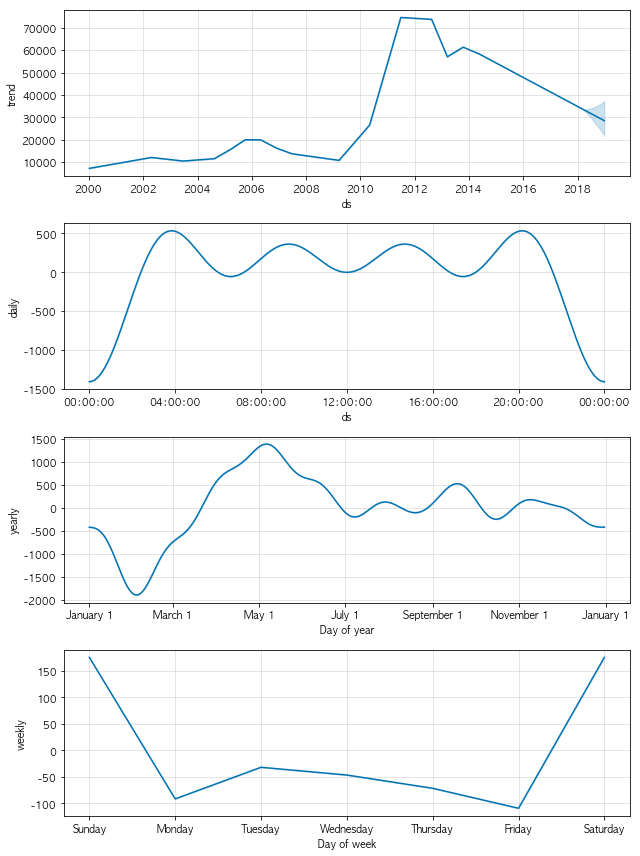

In [31]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


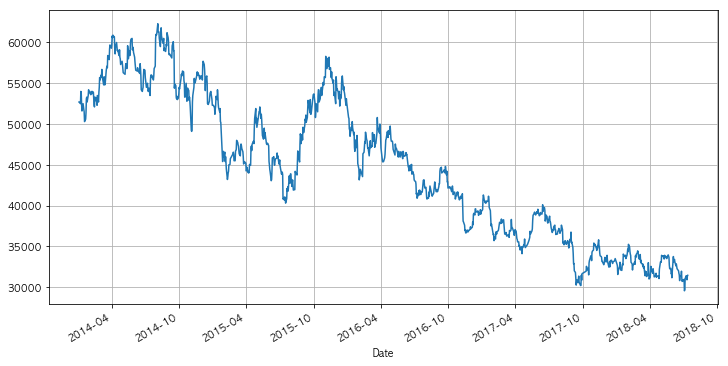

In [33]:
start_date = '2014-1-1' 
end_date = '2018-7-15' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

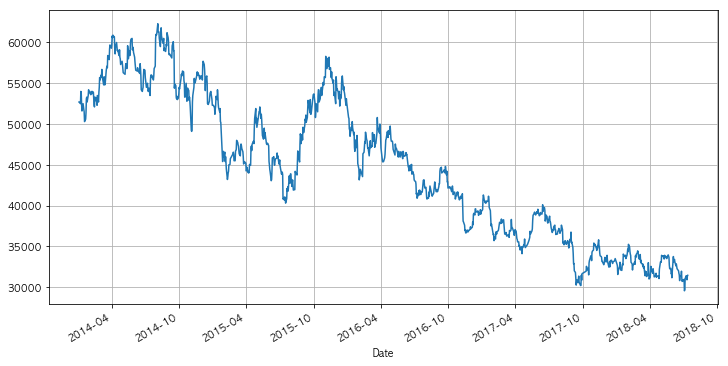

In [35]:
KIA_trunc = KIA[:'2018-07-15']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [36]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [37]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [38]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
1168,2018-09-08
1169,2018-09-09
1170,2018-09-10
1171,2018-09-11
1172,2018-09-12


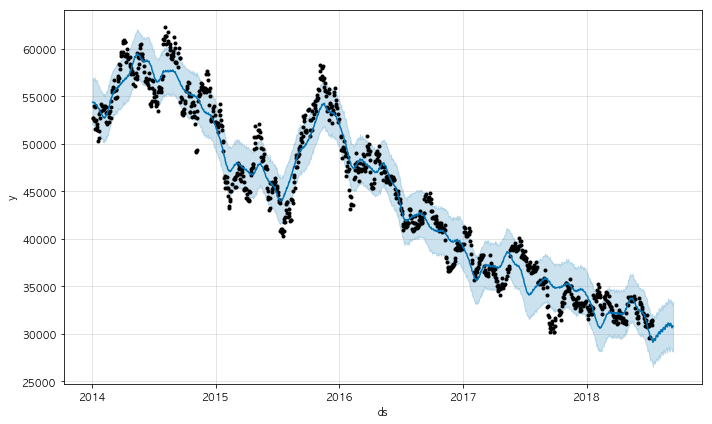

In [39]:
forecast = m.predict(future)
m.plot(forecast);

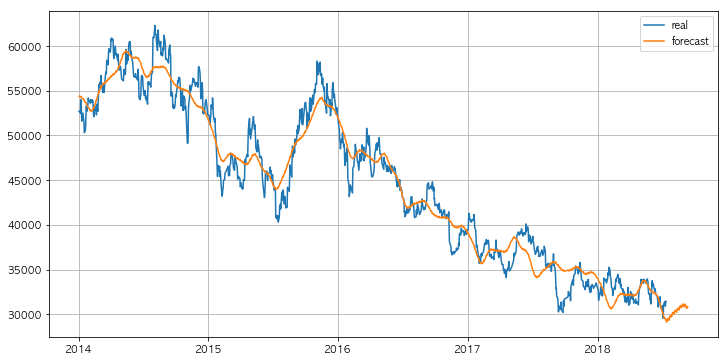

In [40]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## 7-4 Growth Model과 Holiday Forecast

In [34]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])

In [35]:
df['cap'] = 8.5

In [36]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

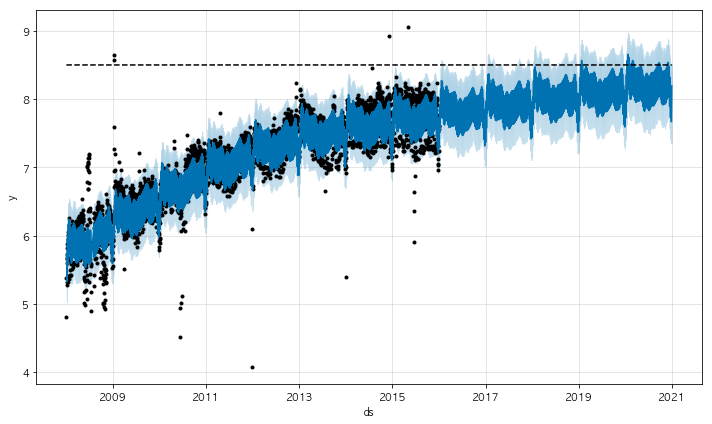

In [37]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

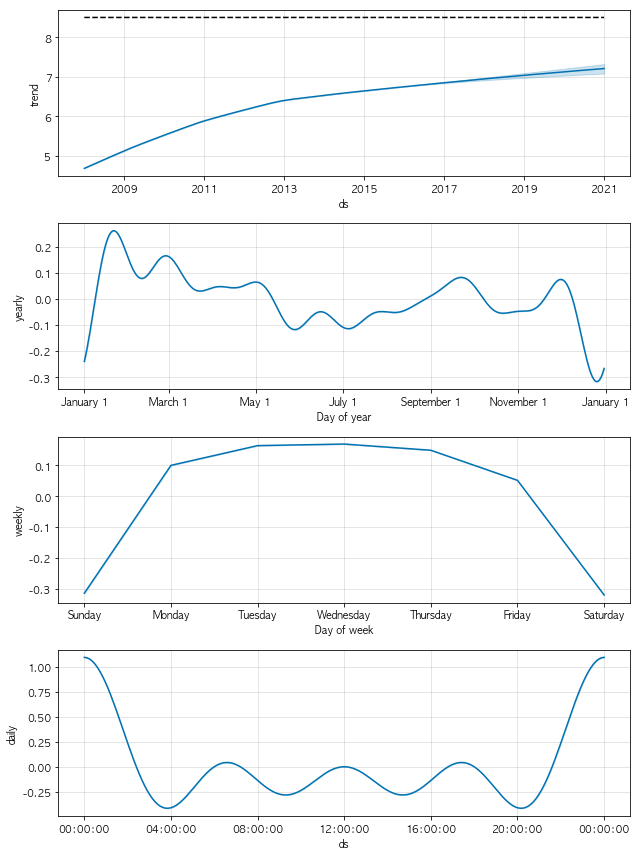

In [38]:
forecast = m.predict(future)
m.plot_components(forecast);

## holiday

In [39]:
df = pd.read_csv('../data/08. example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

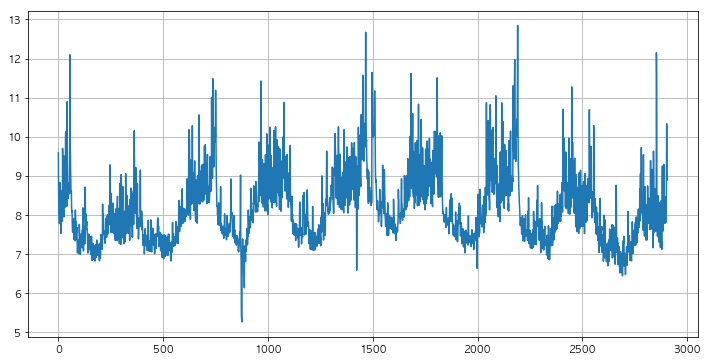

In [40]:
df.y.plot(figsize=(12,6), grid=True);

In [41]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [42]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [43]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.225683,1.174862
2191,2014-02-03,1.901161,1.456941
2532,2015-01-11,1.225683,0.000000
2533,2015-01-12,1.901161,0.000000
2901,2016-01-17,1.225683,0.000000
2902,2016-01-18,1.901161,0.000000
2908,2016-01-24,1.225683,0.000000
2909,2016-01-25,1.901161,0.000000
2922,2016-02-07,1.225683,1.174862
2923,2016-02-08,1.901161,1.456941


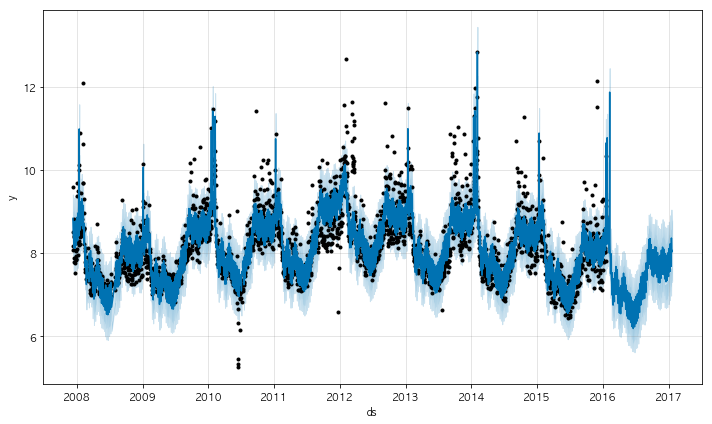

In [44]:
m.plot(forecast);

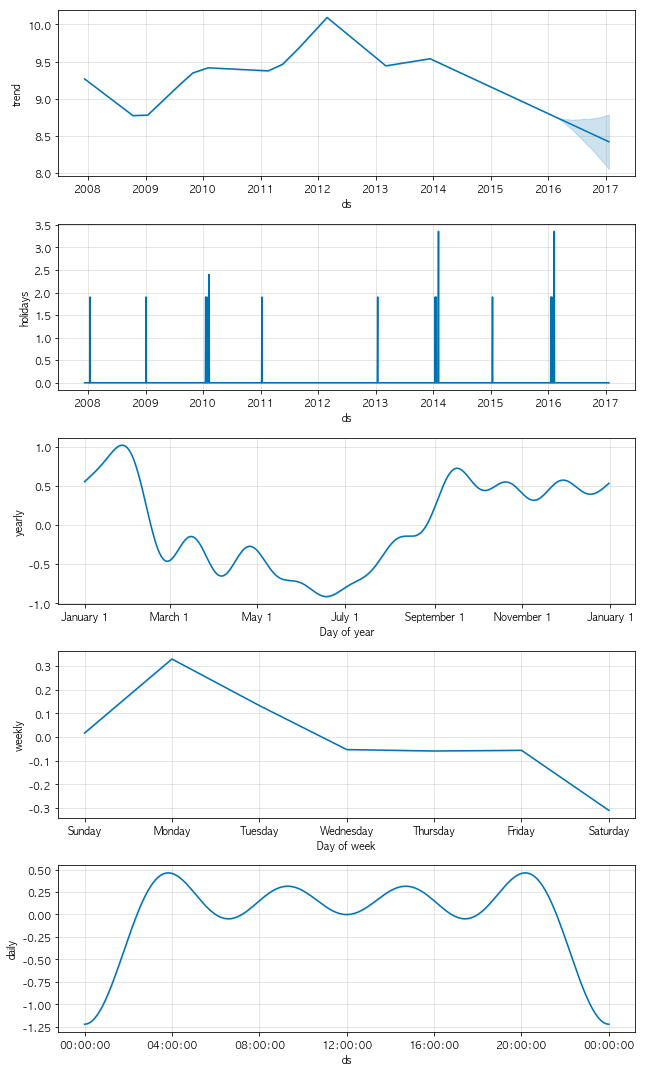

In [45]:
m.plot_components(forecast);